# Vegetable Prices for the year 2023 

In [1]:
from IPython.display import display, HTML, Image

# Display the image in the center of the notebook
display(HTML('<center><img src=https://rosch-law.com/wp-content/uploads/2017/05/apples-1841132_1280-1024x682.jpg width="500" height="500"></center>'))


### Table of Content

#### [1. Project Overview](#1.Project_Overview)
- [1.1 Introduction](#1.1_Introduction)
- [1.2 Problem Statement](#1.2_Problem_Statement)
- [1.3 Objectives](#1.3_Objectives)
####  [2. Importing Packages](#2.Import_Packages)
#### [3. Loading Data](#3.Loading_data)
#### [4. Data Cleaning](#4.Data_Cleaning)
#### [5. Exploratory Data Analysis (EDA)](#5.Exploratory_Data_Analysis_(EDA))
#### [6. Conclusion](#6.Conclusion)

### 1.Project_Overview


#### 1.1_Introduction

This dataset captures the price fluctuations of various vegetables over the year 2023,offering insights into market trends,seasonal impacts and overall price volatility.The data encompasses details like the vegetable name,unit price.By analyzing this dataset,we can uncover patterns in vegetable pricing, evaluate the influence of external factors like weather or economic conditions, and predict future price trajectories.

#### 1.2_Problem_Statement


Vegetable prices fluctuate significantly making it difficult for farmers,retailers and consumers to plan and make informed decisions.Factors such as seasonality,Logistics and changing demand patterns contribute to price volatility.

#### 1.3_Objectives

- Determine which months have the highest and lowest prices for each vegetable.This could help retailers and consumers plan ahead by purchasing or storing vegetables when prices are lower.
- Calculate the average price for each vegetable to establish a baseline for cost expectations.
- Examine the correlation between vegetable prices to understand how changes in one commodity affect the prices of others.
  

### 2.Import_Packages

In [2]:
# Libraries for data loading, manipulation and analysis

import numpy as np
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt

# Displays output inline
%matplotlib inline

# Libraries for Handing Errors
import warnings
warnings.filterwarnings('ignore')

### 3.Loading_data

In [3]:
import pandas as pd

df = pd.read_csv('prices.csv')

### 4.Data_Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Price Dates             287 non-null    object 
 1   Bhindi (Ladies finger)  287 non-null    float64
 2   Tomato                  287 non-null    int64  
 3   Onion                   287 non-null    float64
 4   Potato                  287 non-null    int64  
 5   Brinjal                 287 non-null    int64  
 6   Garlic                  287 non-null    int64  
 7   Peas                    287 non-null    int64  
 8   Methi                   287 non-null    int64  
 9   Green Chilli            287 non-null    float64
 10  Elephant Yam (Suran)    287 non-null    int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 24.8+ KB


In [5]:
df.describe()

,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
count,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000
mean,29.444251,16.006969,20.649826,18.585366,31.655052,133.101045,66.658537,20.383275,44.122404,28.797909
std,8.124815,0.118056,11.711204,2.726238,11.725421,60.078331,33.302415,117.428417,12.796590,6.607973
min,17.000000,16.000000,8.000000,12.000000,14.000000,50.000000,22.000000,5.000000,0.130000,12.000000
25%,22.000000,16.000000,12.000000,16.000000,25.000000,85.000000,40.000000,8.000000,35.000000,25.000000
50%,27.500000,16.000000,16.000000,20.000000,30.000000,120.000000,60.000000,12.000000,40.000000,30.000000
75%,33.000000,16.000000,25.000000,20.000000,35.000000,165.000000,80.000000,16.000000,50.000000,30.000000
max,60.000000,18.000000,57.000000,24.000000,80.000000,290.000000,150.000000,2000.000000,90.000000,50.000000


In [6]:
df.head()

,Price Dates,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
0,01-01-2023,35.0,18,22.0,20,30,50,25,8,45.0,25
1,02-01-2023,35.0,16,22.0,20,30,55,25,7,40.0,25
2,03-01-2023,35.0,16,21.0,20,30,55,25,7,40.0,25
3,04-01-2023,30.0,16,21.0,22,25,55,25,7,40.0,25
4,08-01-2023,35.0,16,20.0,21,25,55,22,6,35.0,25


### 4.1 Check and handling missing values

##### rows with missing values

In [7]:
# check for missing values in each row

rows_missing_vals = df.isnull().any(axis=1) # creates a boolean Series (return True for rows with any missing values).
num_records_w_missing_vals = rows_missing_vals.sum()

print(f'Number of records with missing values: {num_records_w_missing_vals}')

Number of records with missing values: 0


##### columns with missing values

In [8]:
# Count number of missing values per column

missing_vals_col = df.isnull().sum() # calculates the total count of True values for each column

print(missing_vals_col)

Price Dates               0
Bhindi (Ladies finger)    0
Tomato                    0
Onion                     0
Potato                    0
Brinjal                   0
Garlic                    0
Peas                      0
Methi                     0
Green Chilli              0
Elephant Yam (Suran)      0
dtype: int64


##### check for duplicate dates

In [9]:
# Group by the 'Price Dates' column and count occurrences
duplicate_counts = df.groupby('Price Dates').size()

# Filter to get only dates that appear more than once
duplicates_more_than_once = duplicate_counts[duplicate_counts[duplicate_counts > 1]]

print(duplicates_more_than_once)

Series([], dtype: int64)


This dataset does not contain missing values or duplicate dates

##### Imputing unrealistic min & max with suitable values

In [10]:

def clean_unrealistic_values(df):
    # For 'Green Chilli', values greater than 10 are unrealistic
    df['Green Chilli'] = df['Green Chilli'].apply(lambda x: np.nan if x < 15 else x)

    # For 'Methi', values greater than 50 are unrealistic
    df['Methi'] = df['Methi'].apply(lambda x: np.nan if x > 50  else x)

    # Replace NaN values (unrealistic entries) with the median
    df['Green Chilli'].fillna(df['Green Chilli'].median(), inplace=True)
    df['Methi'].fillna(df['Methi'].median(), inplace=True)
    
    return df

# Clean the dataframe
df_cleaned = clean_unrealistic_values(df)

# assign clean dataframe as the main dataframa
df = df_cleaned
df

,Price Dates,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
0,01-01-2023,35.0,18,22.0,20,30,50,25,8.0,45.0,25
1,02-01-2023,35.0,16,22.0,20,30,55,25,7.0,40.0,25
2,03-01-2023,35.0,16,21.0,20,30,55,25,7.0,40.0,25
3,04-01-2023,30.0,16,21.0,22,25,55,25,7.0,40.0,25
4,08-01-2023,35.0,16,20.0,21,25,55,22,6.0,35.0,25
...,...,...,...,...,...,...,...,...,...,...,...
282,27-12-2023,45.0,16,30.0,20,70,260,40,16.0,40.0,25
283,28-12-2023,45.0,16,30.0,20,70,260,30,20.0,45.0,25
284,29-12-2023,45.0,16,30.0,22,80,260,30,18.0,50.0,25
285,31-12-2023,45.0,16,26.0,20,60,250,40,16.0,50.0,40


### 5.Exploratory_Data_Analysis_(EDA)

##### Examine correlation using a heat map

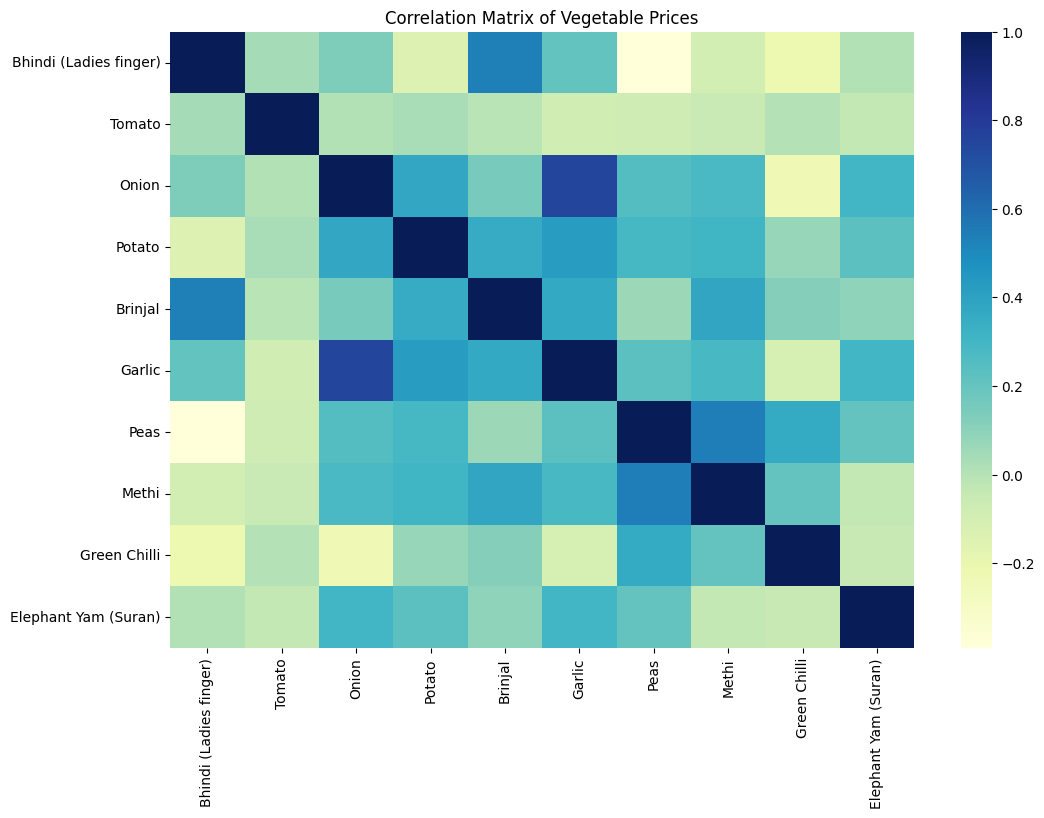

In [12]:
# Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Create a heatmap using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), cmap='YlGnBu', fmt=".2f")
plt.title('Correlation Matrix of Vegetable Prices')
plt.show()

### 6.Conclusion